1. (Schemata) [0.5 point] Consider the two schemata A1 = #0#101###, A2 = ##010#111. Which of the two schemata has the highest chance to survive mu- tation, for a mutation rate pm = 0.01? (Justify your answer).

Schema with lower order is more likely to survive. Since a schema order is the number of its fixed bits, the order of A1 is 4 and the order of A2 is 6. As mutation is applied gene by gene with probability $p_m$, also all fixed bits must remain unchanged, the probability of a gene not being changed is (1-$p_m$) that will extend for the whole genes of scheme with formula $(1- p_m)^{o(H)}$ in which ${o(H)}$ is the order of schema. 

The probability that a schema $H$ survives under mutation $S_m(H)$ is $(1 - p_m)^{o(H)}$.
Given A1 = \#0\#101\#\#\#, A2 = \#\#010\#111 and $p_m = 0.01$; we have 


\begin{gather*} 
S_m(A1) = (1 - 0.01) ^ 4 = 0.96 \\
S_m(A2) = (1 - 0.01) ^ 6 = 0.94
\end{gather*}
Thus, Schema A1 is more likely to survive.

2. (Building Block Hypothesis) [0.5 point] Describe a problem where the Building Block Hypothesis does not hold. Explain why.

The Building Block Hypothesi says that short, low order, high fitness schema while mutating, crossing and selecting will lead to better stepvise results. It fails in cases when we're looking for a specific solution. For example, we're looking for a specific number. If we look at all numbers and take the highest ones we get the highest number, but the numbers combined are not garanteed to be closer to the one we're aiming for, even if our goal is a high number.

3. (Selection Pressure) [1 point] Given the fitness function f(x) = x2, calculate the probability of selecting the individuals x = 2, x = 3, and x = 4, using roulette wheel selection. Calculate the probability of selecting the same individuals when the fitness function is scaled as follows f1(x) = f(x) + 20. Which fitness function yields a lower selection pressure? What can you conclude about the effect of fitness scaling on selection pressure?

f(x) = x2 \
fitness at x=2 is x*2 = 2*2 = 4 \
4/18 = 0.22 \
fitness at x=3 is x*2 = 3*2 = 6 \
6/18 = 0.33 \
fitness at x=4 is x*2 = 4*2 = 8 \
8/18 = 0.44 \
The chances of selecting x=2 are approximately 22%, x=3 are 33% and x=4 are 66%\
\
for f(x) = f(x) + 20 \78
fitnes at x=2 is x*2+20 = 2*2+20 = 24 \
24/78 = 0.31 \
fitness at x=3 is x*2+20 = 3*2+20 = 26 \
26/78 = 0.33 \
fitness at x=4 is x*2+20 = 4*2+20 = 28 \
28/78 = 0.36 \
The chances of selecting x=2 are approximately 31%, x=3 are 33% and x=4 are 36%\

The second fitness function creates a smaller change in selection pressure between the given values of x. From this we conclude that if the difference between fitness values if greater so will the difference between selection pressures.

4. (Role of selection in GA’ s) [2 points] A simple (1+1)-GA for binary problems works as follows.

(a) Randomly generate a bit sequence $x$.

(b) Create a copy of $x$ and invert each of its bits with probability $p$. Let $x_m$ be the
result.

(c) If $x_m$ is closer to the goal sequence than $x$ then replace $x$ with $x_m$.

(d) Repeat the process from step (b) with the new $x$ until the goal sequence is reached.



In [ ]:
from random import random, choice

def invert(x, p):
    #Create a copy of x and invert each of its bits with probability p
    x_m = ''
    for bit in x:
        if random() < p:
            x_m += '1' if (bit == '0') else '0'
        else:
            x_m += '1' if (bit == '1') else '0'
    return x_m

def hamming(s1, s2):
    #Find hamming distance between x_m and goal sequence
    assert len(s1) == len(s2)
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

def main(goal_sequence, p):
    #Randomly generate a bit sequence x.
    x = ''.join(choice('01') for _ in range(len(goal_sequence)))
    print('started from the bottom ', x)

    while x != goal_sequence:
        #Create a copy of x and invert each of its bits with probability p. Let x_m be the result.
        x_m = invert(x, p)
        #If x_m is closer to the goal sequence than x then replace x with x_m.
        if hamming(x_m, goal_sequence) < hamming(x, goal_sequence):
            print('Replacing ', x, ' with ', x_m)
            x = x_m
    
    print('now we here ', x, ' = ', goal_sequence)
    return x

goal_sequence = '0101100010'
p = 0.2
main(goal_sequence, p)

started from the bottom  0000000101
Replacing  0000000101  with  0011000111
Replacing  0011000111  with  0011000010
Replacing  0011000010  with  0011100010
Replacing  0011100010  with  0001100010
Replacing  0001100010  with  0101100010
now we here  0101100010  =  0101100010


'0101100010'

The Counting Ones problem amounts to find a bit string whose sum of its entries is maximum. Implement a simple (1 + 1)-GA for solving the Counting Ones problem.

(a) Use bit strings of length $l = 100$ and a mutation rate $p = 1/l$. For a run of 1500 iterations, plot the best fitness against the elapsed number of iterations.

(b) Now do 10 runs. How many times the algorithm finds the optimum?

(c) Now replace (c) in the above algorithm with (c’ ): replace $x$ with $x_m$. Is there a difference in performance when using this modification? Justify your answer.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



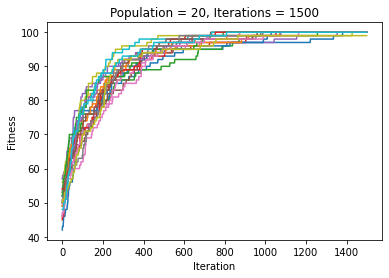

In [ ]:
import matplotlib.pyplot as plt
l = 100
p = 1/l
iterations = 1500
population = 20

def fitness(string):
    #sum of its entries
    return sum([int(bit) for bit in string])

def create_strings(l, population):
    #create bit string of length l=100
    return [''.join(choice('01') for _ in range(l)) for i in range(population)]

def mutate(string, p):
    #mutate string based on probability p
    mutated = ''
    for bit in string:
        if random() < p:
            mutated += '1' if (bit == '0') else '0'
        else:
            mutated += '1' if (bit == '1') else '0'
    return mutated

def genetic_algorithm(iterations):
    pool = create_strings(l, population)
    top = []
    for string in pool:
      best = [] #strings with the best fitness
      parent = string
      for iteration in range(iterations):
          child = mutate(parent, p)

          if fitness(child) > fitness(parent):
              parent = child
              best.append(child)
          else:
              best.append(parent)
      top.append(best)
    return top

#1500 runs
lineage = genetic_algorithm(iterations)
print(lineage)
for _ in lineage:
  plt.plot([fitness(string) for string in _])
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.title('Population = 20, Iterations = 1500')
plt.show()

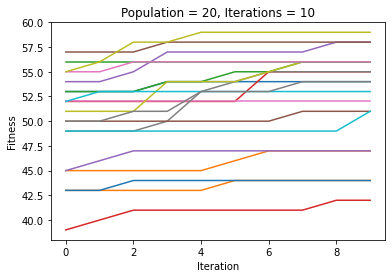

In [ ]:
#10 runs
lineage = genetic_algorithm(10)
for _ in lineage:
  plt.plot([fitness(string) for string in _])
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.title('Population = 20, Iterations = 10')
plt.show()

The algorithm is not able to find the optimum within 10 runs. 

5. (Evolutionary strategies vs local search) [1 point] Consider a (1+5) ES. How does this differ from the (1+1) ES in how the search space is explored when optimizing a function? How does the (1+λ) ES strategy behave with respect to the value of λ when compared to greedy algorithms? (Recall that greedy algorithms perform a sequence of locally optimal steps in order to search for an optimal solution.)

Using the above explanations, in (1+5) ES, for one parent

a) first, we create five copies of the current parent

b) Then we invert each bit of the five copies with the probability p, Let $x_{m1}$ to $x_{m5}$ be the results.

c) Each result compete with the parent, and we select the best ones as the new parent.

d) repeat if not the goal is not meet.

Obviously, the (1+5)ES strategy explores the search space more than (1+1)ES. In other words, in $(1+\lambda)$ES as $\lambda$ grows, the chance of reaching the global optimal increases. In contrast, if we use $\lambda=1$ the search tends to the local solutions similar to the greedy algorithm.

It would be a good choice if we select a big $\lambda$ at the first steps of search and reduce it gradually.

6. (Memetic algorithms vs simple EAs) [2.5 point] Implement the simple EA for the TSP described in our first lecture (see slides).

(a) Implement a variant of this algorithm based on memetic algorithms. Compare the performance of the two algorithms in a fair way on the TSP problem in- stance given in the file ‘file-tsp’ and on one small instance at your choice from the ‘Symmetric Traveling Salesman Problem’ benchmark instances available at http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsplib.html. The file ‘file-tsp’ contains a 50 × 2 matrix with the coordinates (xi, yi) for city i = 1, . . . , 50. Please provide URL link to your source code and results containing clear instructions on how to reproduce your results.

(b) On the TSP problem are memetic algorithms more effective than the simple EA’ s? (To answer this question, use the results of your investigation as well as recent results from the literature).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

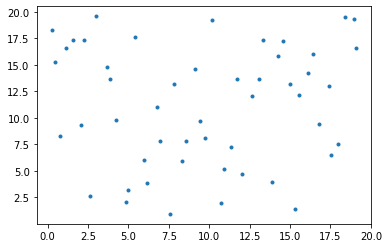

In [ ]:
# read data (point coordinates)
Cor = np.loadtxt('file-tsp.txt')
plt.plot(Cor[: ,0] , Cor[:,  1] ,'.')
num_city = np.size(Cor , 0)

In [ ]:
def getFitness(x):
  sum = 0
  for i in range(num_city-1):
    sum += np.sqrt((Cor[x[i],0]-Cor[x[i+1],0])**2 + (Cor[x[i],1]-Cor[x[i+1],1])**2)
  return sum

In [ ]:
# params
num_population = 30
num_generation = 1000
mutation_rate = 0.05

In [ ]:
# initialiaztion
X = np.zeros((num_population , num_city),dtype = np.int32)
F = np.zeros((num_population))
np.random.seed(101)
for i in range(num_population):
  X[i] = np.random.permutation(num_city)

In [ ]:
def cross_over(X):
  # defining crossover function 
  for i in range(0,num_population , 2):
    par1 = X[i]
    par2 = X[i+1]

    # creating two random cut points
    cut1 = np.random.randint(low = 0 ,high=num_city//2)
    cut2 = np.random.randint(low = num_city//2 , high = num_city)
    
    offspring1 = -np.ones_like(par1)
    offspring2 = -np.ones_like(par2)

    offspring1[cut1 : cut2 + 1] = par1[cut1 : cut2 + 1]
    offspring2[cut1 : cut2 + 1] = par2[cut1 : cut2 + 1]

    cnt1 = 0
    cnt2 = 0
    for j in range(num_city):
      if np.isin(par2[j],offspring1) == False:
        if cnt1 < cut1:
          offspring1[cnt1] = par2[j]
        else:
          offspring1[cnt1 - cut1 + cut2 + 1] = par2[j]
        cnt1 += 1
      if np.isin(par1[j],offspring2) == False:
        
        if cnt2 < cut1:
          offspring2[cnt2] = par1[j]
        else:
          offspring2[cnt2 - cut1 + cut2 + 1] = par1[j]
        cnt2 += 1
    
    X[i] = offspring1
    X[i+1] = offspring2


######################################
def mutation(X):
  # defining mutation function
  for i in range(num_population):
    if np.random.rand() < mutation_rate:    # the probability of a random number less than mutation_rate is 0.05
      # generating two random numbers  
      s1 = np.random.randint(low = 0 , high = num_city)
      s2 = np.random.randint(low = 0 , high = num_city)
      # swapping two values
      t = X[i , s1]
      X[i , s1] = X[i , s2]
      X[i , s2] = t

In [ ]:
# testing the crossover function
print ("X[0] before cross over \n", X[0])
print (X[1])
cross_over(X)
print ("X[0] after cross over \n", X[0])
print (X[1])

X[0] before cross over 
 [37 14 21 32 22  1 26 46 42 47 16 24  7 45 18  3 41 30 15 20 43 38 44 39
 10 49 25 33 36  2 27 34 35  8 19 29 12  5  0 28  4 40 13  9 48 23  6 17
 11 31]
[34 41 25  1  6  7 38  0 31 49 32 21  4 43 16 48  3 47 37 46 28 18  2 13
  9 39  5 44 45 14 23 40 26 22  8 27 20 10 30 35 19 36 24 29 33 15 11 17
 12 42]
X[0] after cross over 
 [ 1  6 31 32 21  4 16 48 47 37 46 28  7 45 18  3 41 30 15 20 43 38 44 39
 10 49 25 33 36  2 27 34 35  8 19 29 12  5  0 13  9 14 23 40 26 22 24 11
 17 42]
[21 32  1 42 24  7 41 15 38 49 25 33  4 43 16 48  3 47 37 46 28 18  2 13
  9 39  5 44 45 14 23 40 26 22  8 27 20 10 30 36 34 35 19 29 12  0  6 17
 11 31]


Iter 0 from 1000
Iter 100 from 1000
Iter 200 from 1000
Iter 300 from 1000
Iter 400 from 1000
Iter 500 from 1000
Iter 600 from 1000
Iter 700 from 1000
Iter 800 from 1000
Iter 900 from 1000


Text(0, 0.5, 'fitness')

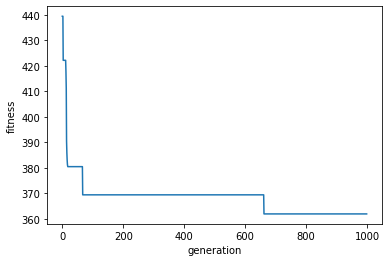

In [ ]:
# main loop of simple GA
best_solution = []
best_fit = np.inf * np.ones((num_generation))

for iter in range(num_generation):

  for i in range(num_population):
    F[i] = getFitness(X[i])

  isort = np.argsort(F)
  X = X[isort]
  F = F[isort]

  if iter > 0:
    best_fit[iter] = best_fit[iter - 1]

  if (F[0] < best_fit[iter]):
    best_fit[iter] = F[0]
    best_solution = X[0]
  
  cross_over(X)

  mutation(X)

  if (iter % 100 == 0):
    print('Iter '+ str(iter)+ ' from '+ str(num_generation))

plt.plot(best_fit)
plt.xlabel('generation')
plt.ylabel('fitness')

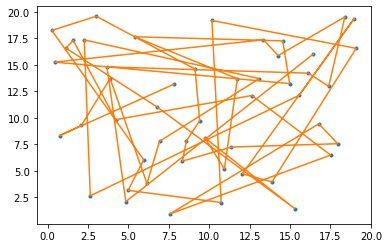

In [ ]:
# plot output of simple GA
plt.plot(Cor[: ,0] , Cor[:,  1] ,'.')
plt.plot(Cor[best_solution , 0],Cor[best_solution , 1])
plt.show()

In [ ]:
# initialiaztion
X = np.zeros((num_population , num_city),dtype = np.int32)
F = np.zeros((num_population))
np.random.seed(101)
for i in range(num_population):
  X[i] = np.random.permutation(num_city)

In [ ]:
from scipy.spatial.distance import cdist
Dist = cdist(Cor , Cor)
Dist[Dist == 0] = np.inf
index_nearest_city = np.argmin(Dist,axis = 1)

In [ ]:
def local_search(X , F):
  for i in range(num_population):
    for j in range(num_city-1):
      copy = np.array(X[i])
      nc = index_nearest_city[copy[j]]
      copy[copy == nc] = copy[j + 1]
      copy[j+1] = nc
      FC = getFitness(copy)
      if FC < F[i]:
        X[i] = copy
        F[i] = FC

Iter 0 from 1000
Iter 100 from 1000
Iter 200 from 1000
Iter 300 from 1000
Iter 400 from 1000
Iter 500 from 1000
Iter 600 from 1000
Iter 700 from 1000
Iter 800 from 1000
Iter 900 from 1000


Text(0, 0.5, 'fitness')

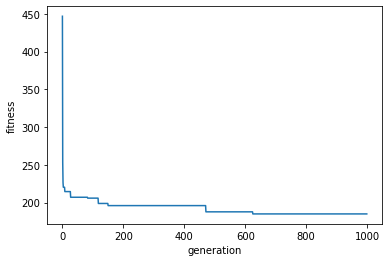

In [ ]:
# main loop of simple GA
best_solution = []
best_fit = np.inf * np.ones((num_generation))

for iter in range(num_generation):

  for i in range(num_population):
    F[i] = getFitness(X[i])

  isort = np.argsort(F)
  X = X[isort]
  F = F[isort]

  if iter > 0:
    best_fit[iter] = best_fit[iter - 1]

  if (F[0] < best_fit[iter]):
    best_fit[iter] = F[0]
    best_solution = X[0]
  
  cross_over(X)

  mutation(X)

  local_search(X , F)

  if (iter % 100 == 0):
    print('Iter '+ str(iter)+ ' from '+ str(num_generation))

plt.plot(best_fit)
plt.xlabel('generation')
plt.ylabel('fitness')

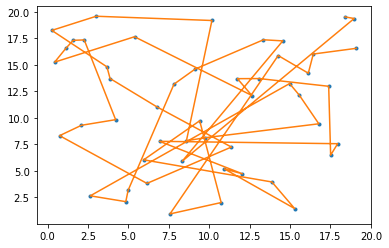

In [ ]:
# plot
plt.plot(Cor[: ,0] , Cor[:,  1] ,'.')
plt.plot(Cor[best_solution , 0],Cor[best_solution , 1])
plt.show()

As it is clear from the fitness function diagram, the speed of convergence in local fitness is higher than simple EA, also local fitness leads to a better optimal solution. To be more concise, the optimal solution for EA converged around 360, while this amount for local converged just below 200. Comparing the performances of two algorithms is observable in the graph of the city. The EA graph is denser than the one for the local version.

7. (Genetic Programming representation) [0.5 point] Give a suitable function, terminal set and s-expression for the following logical and mathematical formulas:

(a) (y∧true)→((x∨y)∨(z↔(x∧y))),



Function set: {∧, ∨, z}

Terminal set: {x, y, true}

S-expression: (∨ (∧ (y, true)), (∨ (x, y)), (z (∧ (x, y))))

(b) 0.234 ∗ z + x–0.789.

Function set: {*, +, 0}

Terminal set: {0.234, z, x, 0.789}

S-expression: (- (0.789, (+ (x, (* (0.234, z))))))

8. (Genetic Programming behaviour) [2 points] Implement a GP program for finding a symbolic expression that fits the following data:

| (Input) Dependent Variable | Y(Output) |
|----------------------------|-----------|
| -1.0                       | 0.0000    |
| -0.9                       | -0.1629   |
| -0.8                       | -0.2624   |
| -0.7                       | -0.3129   |
| -0.6                       | -0.3264   |
| -0.5                       | -0.3125   |
| -0.4                       | -0.2784   |
| -0.3                       | -0.2289   |
| -0.2                       | -0.1664   |
| -0.1                       | -0.0909   |
| 0                          | 0.0       |
| 0.1                        | 0.1111    |
| 0.2                        | 0.2496    |
| 0.3                        | 0.4251    |
| 0.4                        | 0.6496    |
| 0.5                        | 0.9375    |
| 0.6                        | 1.3056    |
| 0.7                        | 1.7731    |
| 0.8                        | 2.3616    |
| 0.9                        | 3.0951    |
| 1.0                        | 4.0000    |

with the following parameter settings: 

|||
|-----------------------|------------------------------------|
| Population size       | 1000                               |
| function set          | {+, −, ∗, log, exp, sin, cos, div} |
| terminal set          | x                                  |
| number of generations | 50                                 |
| crossover probability | 0.7                                |
| mutation probability  | 0                                  |
| fitness               | sum of absolute errors             |

You can use an existing GP framework: see for instance list of implementation frame- works mentioned in the syllabus.

Plot the following:

(a) best of generation fitness (y-axis) versus generation (x-axis).

(b) best of generation size (y-axis) versus generation (x-axis).


Can you observe any undesirable phenomenon from these plots? In case of positive answer, how would you try to overcome the related problem (you can refer to the literature).


Text(0, 0.5, 'Best of generation size')

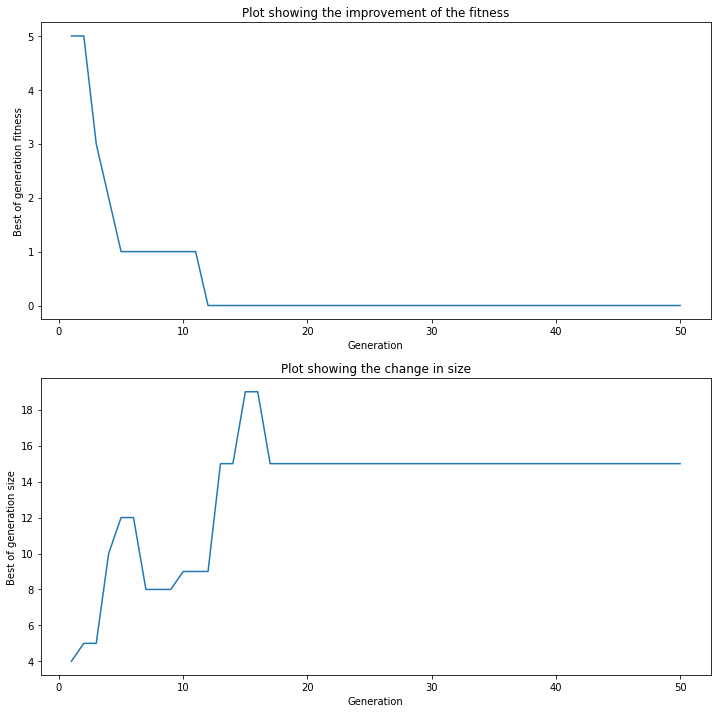

In [ ]:
#!pip install gplearn
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from gplearn import fitness
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import sys

x = np.array([-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0.0000, -0.1629, -0.2624, -0.3129, -0.3264, -0.3125, -0.2784, -0.2289, -0.1664, -0.0909, 0.0, 0.1111, 0.2496, 0.4251, 0.6496, 0.9375, 1.3056, 1.7731, 2.3616, 3.0951, 4.0000])

pop_init = 1000
number_of_gen = 50

def sum_of_absolute_errors(y, y_pred, weights):
  list_of_absolute_errors = [abs(y_pred[i] - y[i]) for i in range(len(y_pred))]
  return sum(list_of_absolute_errors)

sum_of_absolute_errors_fitness = fitness.make_fitness(sum_of_absolute_errors, greater_is_better=False, wrap=True)

def exponential(array):
  r_list = []
  for element in array:
    try:
      r_list.append(math.exp(element))
    except OverflowError:
      r_list.append(sys.maxsize)
  return np.array(r_list)

exp = make_function(function=exponential, name='exp',arity=1)

est_gp = SymbolicRegressor(population_size=pop_init, generations=number_of_gen, p_crossover=0.7, p_subtree_mutation=0.0, p_hoist_mutation=0.0, 
                           p_point_mutation=0.0, function_set={"add", "sub", "mul", "div", "log", "sin", "cos", exp}, metric=sum_of_absolute_errors_fitness)
est_gp.fit(x.reshape(-1, 1), y)

df = pd.DataFrame(columns=['Gen','Fitness','Length'])
for idGen in range(len(est_gp._programs)):
  for idPopulation in range(est_gp.population_size):
    if(est_gp._programs[idGen][idPopulation] != None):
      df = df.append({'Gen': idGen, 'Fitness': est_gp._programs[idGen][idPopulation].fitness_, 'Length': str(est_gp._programs[idGen][idPopulation].length_)}, ignore_index=True)

df_min_fitness = []
df_min_length = []
for i in range(number_of_gen):
  fitness_value = sys.maxsize
  length_value = sys.maxsize
  for index, element in df.iterrows():
    if(element["Gen"] == i):
      if(element["Fitness"] < fitness_value):
        fitness_value = int(element["Fitness"])
      if(int(element["Length"]) < length_value):
        length_value = int(element["Length"])
  df_min_fitness.append(fitness_value)
  df_min_length.append(length_value)
df_min_length[-1] = df_min_length[-2]

fig, axs = plt.subplots(2, 1,figsize=(12,12))
axs[0].plot(range(1, number_of_gen + 1), df_min_fitness)
axs[0].set_title('Plot showing the improvement of the fitness')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Best of generation fitness')
axs[1].plot(range(1, number_of_gen + 1), df_min_length)
axs[1].set_title('Plot showing the change in size')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Best of generation size')

The method sharply reaches a point where it works well but it then still runs the full number of generations. I would add a stopping criteria when the method does not improve more than a certain amount in a few consecutive generations. We could also place a limit on the length so that the complexity of the model doesn't increase after a certain amount in case it reached a success rate we find good enough. 

Source Code also available at: https://github.com/prat8897/Natural-Computing/blob/main/Natural_Computing_Assignment_1.ipynb